# Creando una red neuronal

## Importamos las librerías necesarias

In [126]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Preparamos los datos para entrenamiento y testeo

In [127]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Separamos los datos en test y train

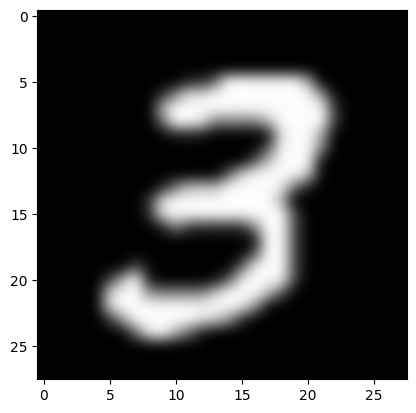

In [128]:
plt.imshow(train_images[7], cmap='gray', interpolation='bicubic') # Mostramos una imagen de ejemplo

In [129]:
# Cambiamos la forma de las imagenes
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [130]:
train_images[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [131]:
# Pasamos las imágenes a categorías
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [132]:
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## Creamos y entrenamos el modelo

In [133]:
# Creamos el modelo
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
    ]
)

In [134]:
model.add(layers.Flatten())

In [135]:
model.add(layers.Dense(64, activation='relu'))

In [136]:
model.add(layers.Dense(10, activation='softmax'))

In [137]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
model.fit(train_images, train_labels, epochs=5, batch_size=64) # Entrenamos el modelo

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8624 - loss: 0.4504
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9816 - loss: 0.0600
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9881 - loss: 0.0390
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9901 - loss: 0.0303
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9924 - loss: 0.0234


In [139]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # Evaluamos el modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0418


In [140]:
print(f"Test accuracy: {test_acc}") # Mostramos la precisión del modelo

Test accuracy: 0.9904999732971191


In [ ]:
model.save('mnist_model.h5')

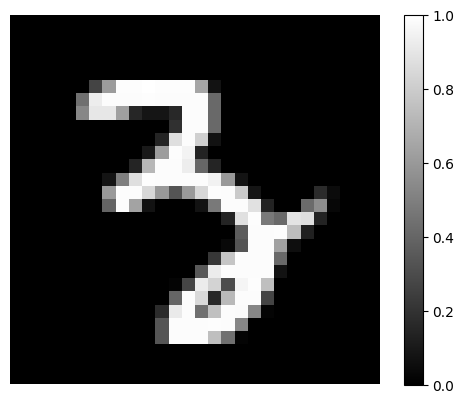

In [142]:
imagen = test_images[87].reshape(28,28)
plt.imshow(imagen, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [143]:
test_images[4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Ejecutamos el modelo

In [ ]:
from tensorflow.keras.models import load_model

modelo_cargado = load_model('mnist_model.h5') # Cargamos el modelo

In [145]:
# Guardamos una imagen de prueba
nueva_imagen = test_images[87]
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [149]:
# Predecimos la imagen
prediccion = modelo_cargado.predict(nueva_imagen)
digito = np.argmax(prediccion)
print(f"Predicción: {digito}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicción: 3


In [ ]:
import netron
netron.start('mnist_model.h5') # Visualizar workflow del modelo

In [150]:
import gradio as gr

modelo = tf.keras.models.load_model("mnist_model.h5")

def clasificar_imagenes(img):
    """
    Predice el dígito en base a una imagen de 28x28 píxeles.
    
    Args -> img: np.array
    Returns -> str: dígito predicho
    """
    img = np.reshape(img, (1, 28, 28, 1)).astype("float32") / 255
    predicciones = modelo.predict(img)
    digito_predicho = np.argmax(predicciones)
    return str(digito_predicho)

# Creamos la interfaz de usuario para usar el modelo
interfaz = gr.Interface(fn=clasificar_imagenes , inputs="sketchpad", outputs="label")
interfaz.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
